<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_4492\1028984636.py:11: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("G:\DS_PROJECT\cricket_simple_dataset.csv")


First 5 rows of dataset:
   PP_Runs  PP_Wkts  Venue_Avg  Final_Score
0       68        2        150          180
1       58        2        156          164
2       44        1        177          168
3       37        1        163          149
4       50        3        144          148

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PP_Runs      120 non-null    int64
 1   PP_Wkts      120 non-null    int64
 2   Venue_Avg    120 non-null    int64
 3   Final_Score  120 non-null    int64
dtypes: int64(4)
memory usage: 3.9 KB
None

Dataset Description:
          PP_Runs     PP_Wkts   Venue_Avg  Final_Score
count  120.000000  120.000000  120.000000   120.000000
mean    49.275000    1.500000  164.541667   162.241667
std     11.889521    1.152272   14.026323    24.055257
min     30.000000    0.000000  140.000000   103.000000
25%     38.0

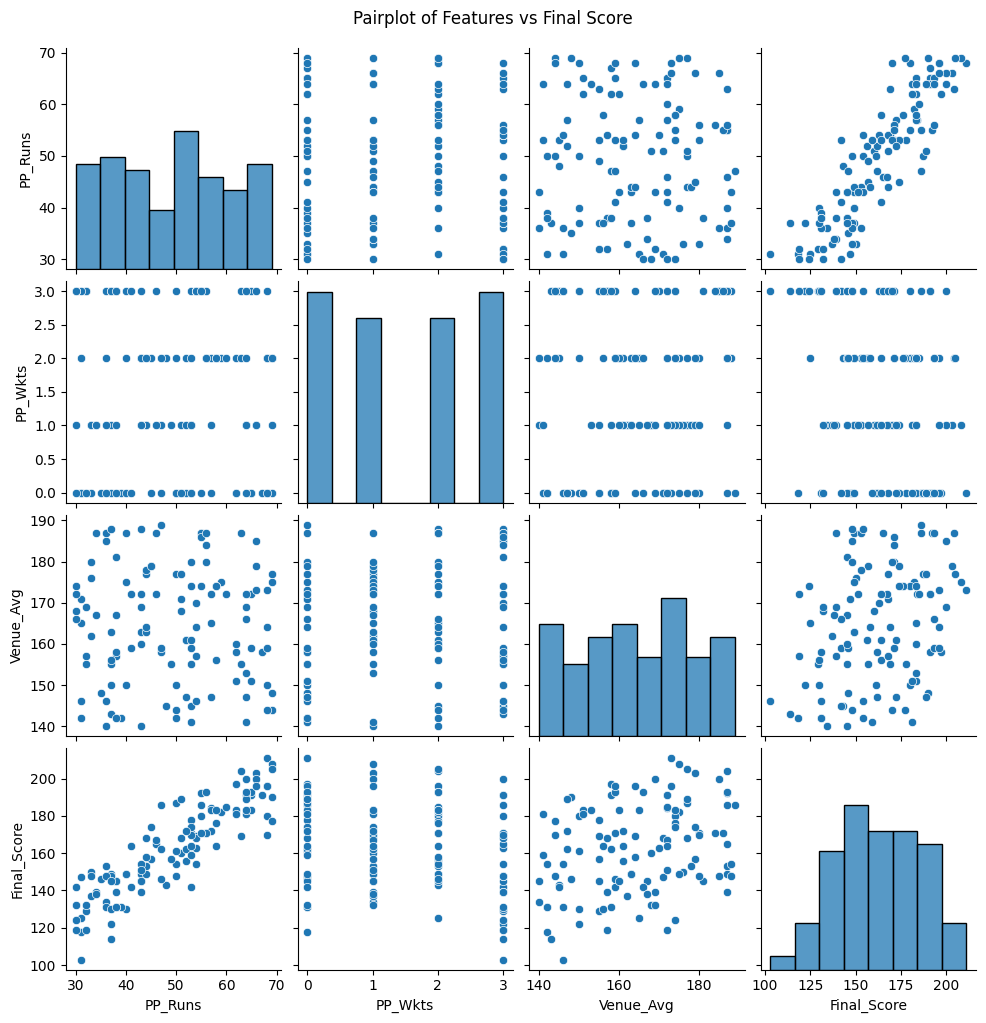

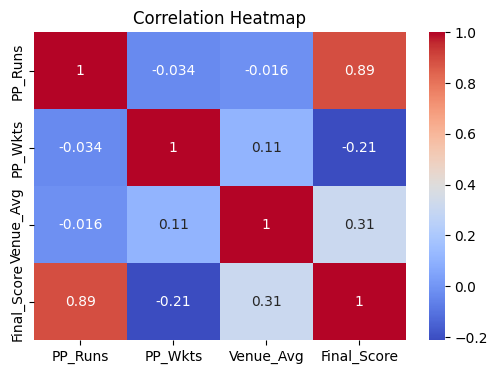


Training samples: 96, Test samples: 24


NameError: name 'y_pred_lr' is not defined

<Figure size 800x600 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("G:\DS_PROJECT\cricket_simple_dataset.csv")

print("First 5 rows of dataset:")
print(df.head())

# Check basic info
print("\nDataset info:")
print(df.info())

# ==========================================================
# STEP 3: Exploratory Data Analysis (EDA)
# ==========================================================
# Check basic statistics
print("\nDataset Description:")

print(df.describe())

# Visualize relationships
sns.pairplot(df)
plt.suptitle("Pairplot of Features vs Final Score", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ==========================================================
# STEP 4: Feature Selection
# ==========================================================
# Features (X) and target (y)
X = df[['PP_Runs', 'PP_Wkts', 'Venue_Avg']]
y = df['Final_Score']

# ==========================================================
# STEP 5: Split Data into Train and Test
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train)}, Test samples: {len(X_test)}")


# ==========================================================
# STEP 8: Visualize Predictions vs Actual
# ==========================================================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Score")
plt.legend()
plt.show()

# ==========================================================
# STEP 9: Predict New Match
# ==========================================================
# Example: PP Runs = 52, Wickets = 1, Venue Avg = 165
new_match = [[52, 1, 165]]

pred_lr = lr_model.predict(new_match)[0]
pred_rf = rf_model.predict(new_match)[0]

print("\nPrediction for new match (PP_Runs=52, PP_Wkts=1, Venue_Avg=165):")
print(f"Linear Regression Prediction: {pred_lr:.0f}")
print(f"Random Forest Prediction: {pred_rf:.0f}")

# ==========================================================
# STEP 10: Feature Importance (Random Forest)
# ==========================================================
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', title="Feature Importance (Random Forest)")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# ==========================================================
# STEP 7: Random Forest Regressor
# ==========================================================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Evaluation:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STEP 7: Random Forest Regressor # ========================================================== 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) rf_model.fit(X_train, y_train)
 # Predict on test set 
_pred_rf = rf_model.predict(X_test)
 # Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Evaluation:") 
print(f"MAE: {mae_rf:.2f}") 
print(f"RMSE: {rmse_rf:.2f}") 
print(f"R² Score: {r2_rf:.2f}")